In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid", context="talk", font_scale=0.8)
data = pd.read_pickle("pf.pkl")
data.head()
new_data = []
for i in range(len(data)):
    temp = list(data.iloc[i][['N', '#procs', 'p_t_mean', 'p_t_std', 'p_c_mean', 'p_c_std', 'instance']])
    temp.append(True)
    new_data.append(temp)
    temp = list(data.iloc[i][['N', '#procs', 'np_t_mean', 'np_t_std', 'np_c_mean', 'np_c_std', 'instance']])
    temp.append(False)
    new_data.append(temp)
new_data = pd.DataFrame(new_data, columns=['N', '#procs', 'time_mean', 'time_std', 'cpu_mean', 'cpu_std', 'instance', 'parallel'])
new_data.head()
new_data.to_csv("parallel_results.csv")
m5large = new_data['instance'] == 'm5large'
m5xlarge = new_data['instance'] == 'm5xlarge'
m52xlarge = new_data['instance'] == 'm52xlarge'
r5large = new_data['instance'] == 'r5large'
r5xlarge = new_data['instance'] == 'r5xlarge'
r52xlarge = new_data['instance'] == 'r52xlarge'
c5large = new_data['instance'] == 'c5large'
c5xlarge = new_data['instance'] == 'c5xlarge'
c52xlarge = new_data['instance'] == 'c52xlarge'

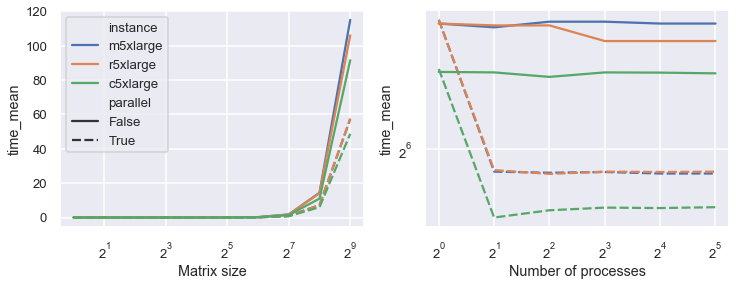

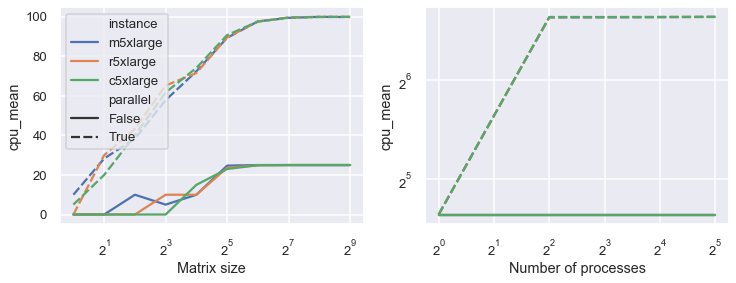

In [5]:
def mylineplot(data, criterion):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 4))

    sns.lineplot(x='N', y=criterion, hue='instance', style='parallel',data=data[data['#procs']==16], ax=ax1)
    ax1.set_xlabel('Matrix size')
    #ax1.set_ylabel('Wall time (s)')
    ax1.set_xscale('log', basex=2)
    ax2.set_yscale('log', basey=2)

    sns.lineplot(x='#procs', y=criterion, hue='instance', style='parallel', data=data[data['N']==512], ax=ax2, legend=None)
    ax2.set_xlabel('Number of processes')
    #ax2.set_ylabel('Wall time (s)')
    ax2.set_xscale('log', basex=2)
    ax2.set_yscale('log', basey=2)
    


    """
    sns.lineplot(x='N', y='p_t_mean', hue='instance', style='instance',data=data_part, ax=ax1)
    sns.lineplot(x='N', y='np_t_mean', hue='instance', style='instance',data=data_part, ax=ax1, legend=None)
    ax1.set_xlabel('Matrix Size')
    ax1.set_ylabel('Number of reviews')
    """
# xlarge series
mylineplot(new_data[m5xlarge+r5xlarge+c5xlarge], 'time_mean')
mylineplot(new_data[m5xlarge+r5xlarge+c5xlarge], 'cpu_mean')

The graphs above shows how run time changes as matrix size and number of parallel processes on different types of instances (m5xlarge, r5xlarge, c5xlarge). As it shows, run time scales in proportion to matrix size's polynomials, while reaches minimum at the time when number of processes equals number of CPU cores. The type c5xlarge reaches the best performance as it is computation-optimized, suitable for computation-dense tasks.

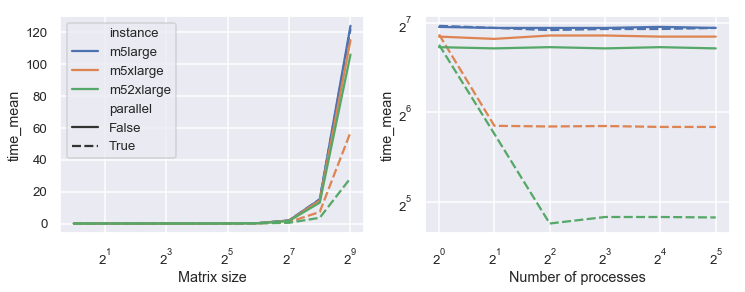

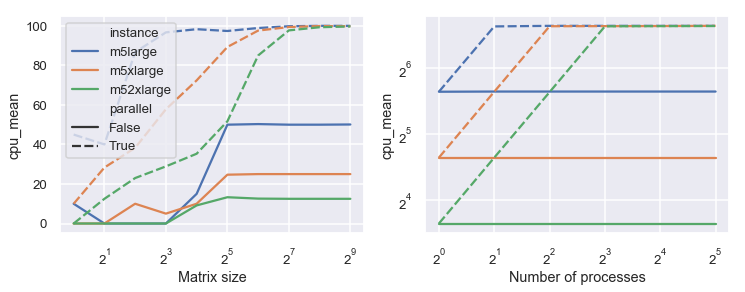

In [7]:
# m series
mylineplot(new_data[m5large+m5xlarge+m52xlarge], 'time_mean')
mylineplot(new_data[m5large+m5xlarge+m52xlarge], 'cpu_mean')

The graph above shows performance on different configurations of the same type of instance (m5). It is worth noting here the decrease of run time between parallel computaion and non-parallel computaion varies as the configurations varies. The most big speedup happens at the best configuration of m52xlarge (8 CPU, 32GB Mem), which suggests for computation-dense tasks, using better configured instances can produce higher speedup through parallelization.

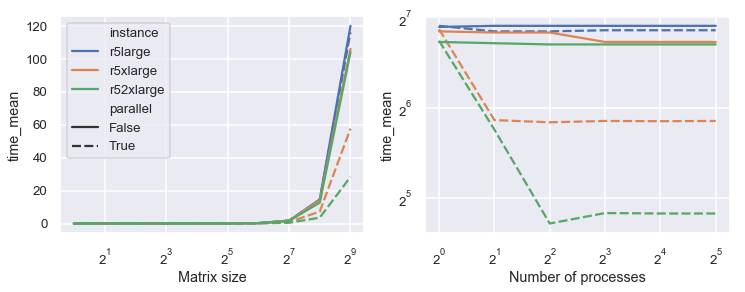

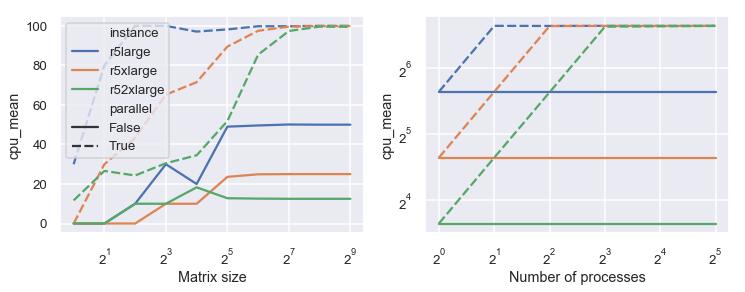

In [8]:
# r series
mylineplot(new_data[r5large+r5xlarge+r52xlarge], 'time_mean')
mylineplot(new_data[r5large+r5xlarge+r52xlarge], 'cpu_mean')

For r5 type of instances (memory optimized), when running on over 10 processes, the non-parallel computation performance on r5xlarge and r52xlarge are similar, while parallel computaion stills varies by a large discrepance. It suggests that better configured memory-optimized instances should be used if tasks are highly parallelized.

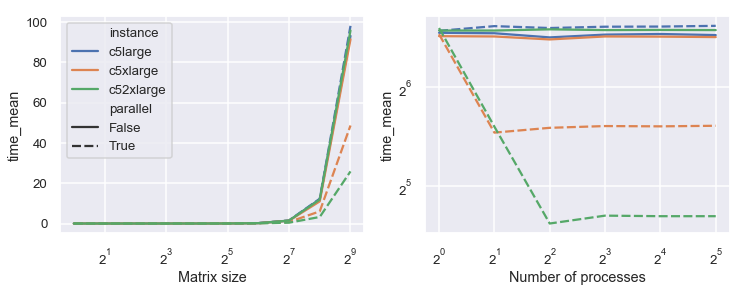

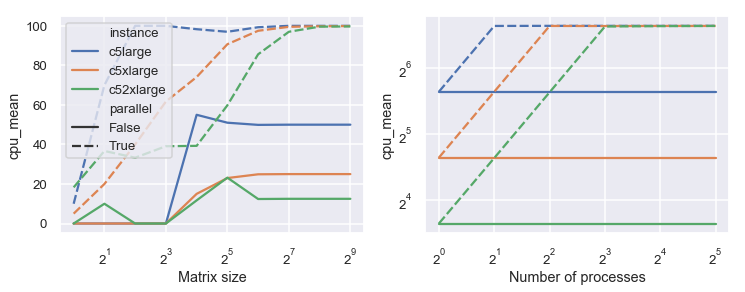

In [9]:
# c series
mylineplot(new_data[c5large+c5xlarge+c52xlarge], 'time_mean')
mylineplot(new_data[c5large+c5xlarge+c52xlarge], 'cpu_mean')

For computation optimized instances, performance doesn't vary by much when running non-parallel tasks on differently configured instances. Therefore for tasks that can't be parallelized, cheap-configured memory optimized instance may be the best choice.